## Problem Statement
##### Data Analytics II

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.

2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [ ]:
df.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [ ]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [ ]:
x=df[['User ID','Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

/home/admin1/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train

,User ID,Gender,Age,EstimatedSalary
249,15753102,1,35,97000
42,15772798,0,35,108000
297,15705298,1,43,112000
127,15745232,0,26,32000
56,15775562,1,23,48000
...,...,...,...,...
73,15782530,1,33,113000
118,15642725,0,40,59000
189,15715160,0,28,32000
206,15654230,1,55,130000


In [ ]:
x_test

,User ID,Gender,Age,EstimatedSalary
218,15666675,1,46,96000
191,15662067,1,19,26000
117,15591433,0,36,52000
50,15694395,1,24,32000
348,15579212,0,39,77000
...,...,...,...,...
184,15759066,1,33,60000
140,15807909,0,19,85000
107,15789863,0,27,89000
241,15736228,0,38,59000


In [ ]:
y_train

249    1
42     0
297    1
127    0
56     0
      ..
73     0
118    0
189    0
206    1
355    1
Name: Purchased, Length: 320, dtype: int64

In [ ]:
y_test

218    0
191    0
117    0
50     0
348    0
      ..
184    0
140    0
107    0
241    0
48     1
Name: Purchased, Length: 80, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

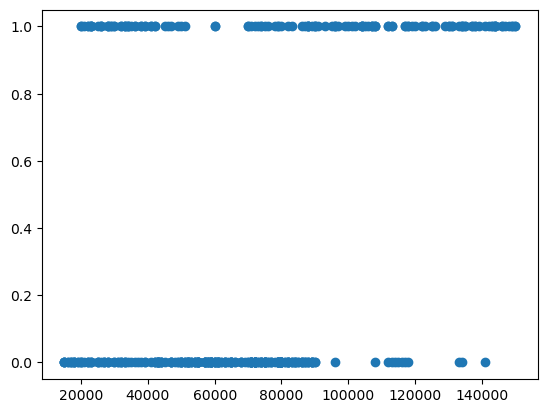

In [ ]:
plt.scatter(df['EstimatedSalary'],df['Purchased'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()

In [ ]:
model=lg.fit(x_train,y_train)
model

LogisticRegression()

In [ ]:
y_pred=lg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
lg.score(x_test,y_test)

0.825

In [ ]:
import sklearn.metrics as sm

In [ ]:
accuracy=sm.accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy*100)

Accuracy :  82.5


In [ ]:
import matplotlib.pyplot as plt
import numpy


In [ ]:
confusion_matrix = sm.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[51,  2],
       [12, 15]])

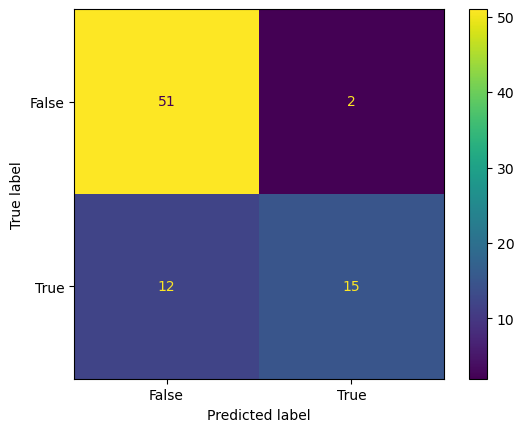

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = sm.confusion_matrix(actual, predicted)

cm_display = sm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])

cm_display.plot()
plt.show()

In [ ]:
#tn=confusion_matrix[0][0]
#fp=confusion_matrix[0][1]
#fn=confusion_matrix[1][0]
#tp=confusion_matrix[1][1]

In [ ]:
tn,fp,fn,tp = confusion_matrix.ravel()
tn,fp,fn,tp

(51, 2, 12, 15)

In [ ]:
precision=tp/(tp+fp)
precision

0.8823529411764706

In [ ]:
recall=tp/(tp+fn)
recall

0.5555555555555556

In [ ]:
Accuracy=(tp+tn)/(tp+fp+tn+fn)
Accuracy

0.825

In [ ]:
Error_rate=(fp+fn)/(tp+fp+tn+fn)
Error_rate

0.175

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
matrix=classification_report(y_test,y_pred)
print("\n",matrix)


               precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.88      0.56      0.68        27

    accuracy                           0.82        80
   macro avg       0.85      0.76      0.78        80
weighted avg       0.83      0.82      0.81        80

